Seaborn 막대 그래프

In [1]:
from matplotlib import pyplot as plt
from pandas import read_excel, concat
import seaborn as sb

In [4]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
성적표df = read_excel('https://data.hossam.kr/D01/grade.xlsx',index_col='이름')
성적표df

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,77,88,64
영희,2,여자,88,120,62,72
민철,1,남자,92,70,83,79
수현,3,여자,63,60,31,71
호영,4,남자,75,50,90,88
혜민,4,여자,80,88,91,72
용식,2,남자,82,88,79,90
나영,1,여자,90,92,81,95
석영,4,남자,91,90,89,80


데이터 전처리

In [11]:
df = 성적표df.astype({"학년": "category", "성별": "category"})
df.dtypes

학년    category
성별    category
국어       int64
영어       int64
수학       int64
과학       int64
dtype: object

##  막대 그래프 그리기
1. 기본 사용 방법
 - barplot() 함수는 기본적으로 집계가 완료된 데이터를 시각화 한다. 
 - x축에 지정된 항목이 중복되지 않는 다면 각 집단별 집계결과를 표시한다

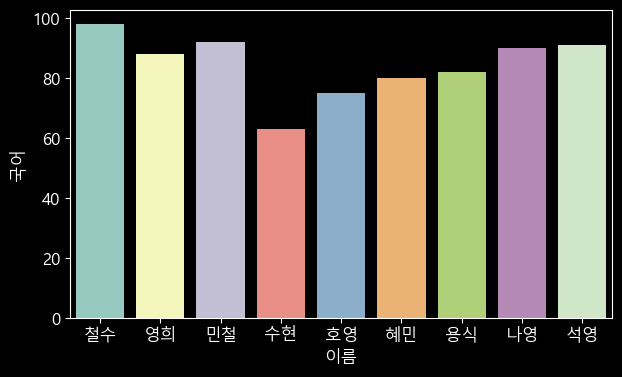

In [15]:
sb.barplot(data=df, x=df.index, y='국어')
plt.show()
plt.close()


### 평균 막대 그래프
- x축에 지정된 데이터에 중복된 값이 있다면 y축은 평균값을 표시한다.
- 그래프에 표시되는막대는 95% 신뢰구간을 의미한다. 

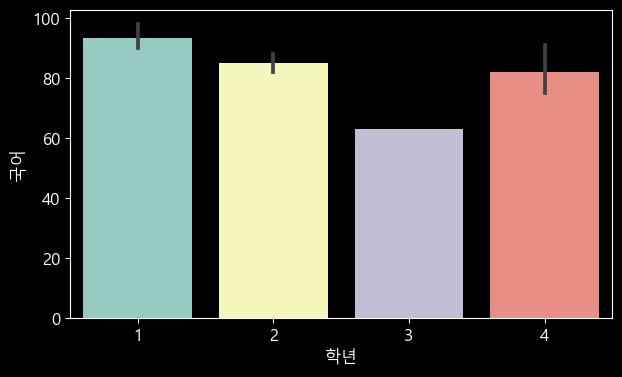

In [16]:
sb.barplot(data=df,x='학년',y='국어')
plt.show()
plt.close()

### 다른 지표 적용하기
- barplot() 함수에 estimator 파라미터를 적용하면 다른 지표를 표시할 수 있다.

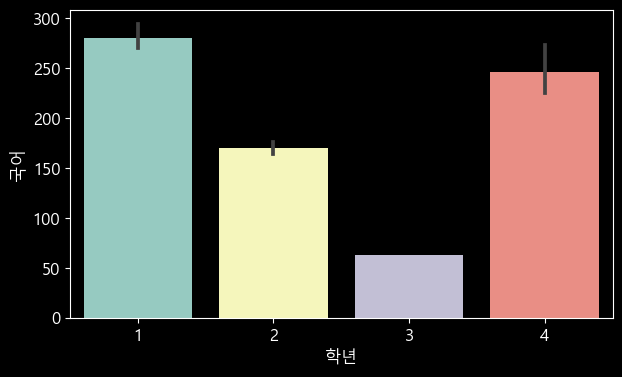

In [17]:
# 합계
sb.barplot(data=df,x='학년',y='국어',estimator='sum')
plt.show()
plt.close()

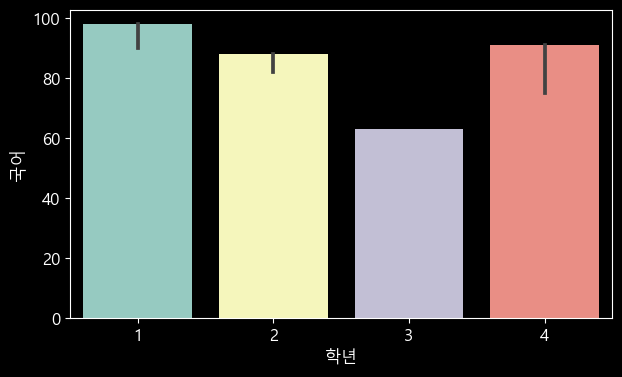

In [18]:
# 최대값
sb.barplot(data=df,x='학년',y='국어',estimator='max')
plt.show()
plt.close()

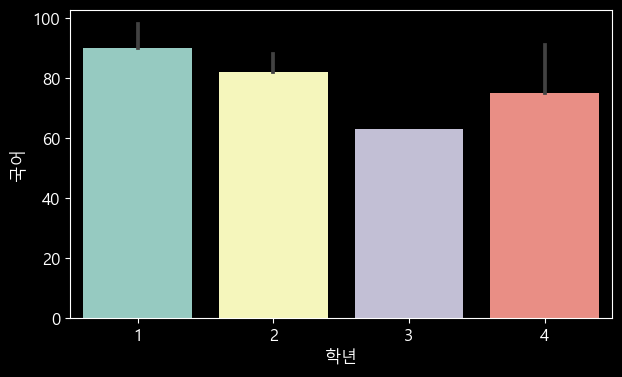

In [19]:
# 최소값
sb.barplot(data=df,x='학년',y='국어',estimator='min')
plt.show()
plt.close()

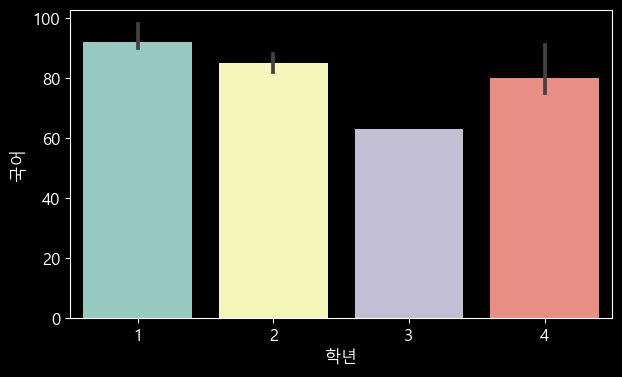

In [20]:
# 중앙값 (데이터를 순서대로 나열한 후 가운데 위치한 값)
sb.barplot(data=df,x='학년',y='국어',estimator='median')
plt.show()
plt.close()

### 범주에 따른 구분
hue 파라미터의 적용

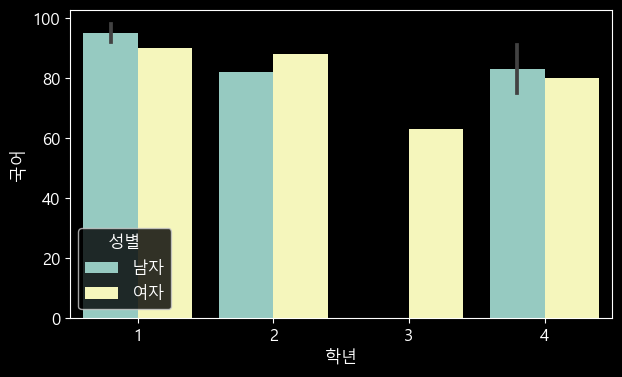

In [22]:
sb.barplot(data=df,x='학년',y='국어',hue='성별',estimator='median')
plt.show()
plt.close()

#### 범주 위치 옮기기

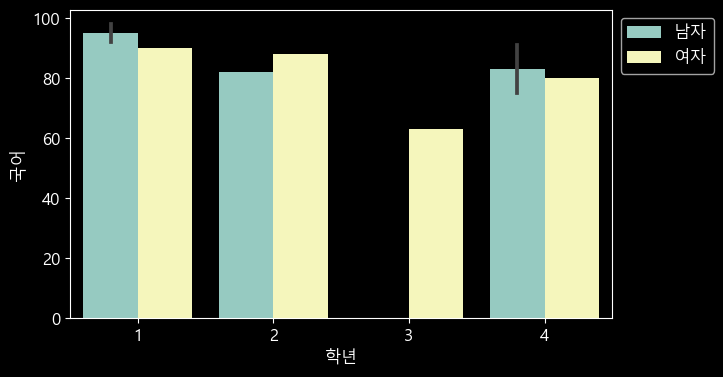

In [23]:
sb.barplot(data=df,x='학년',y='국어',hue='성별',estimator='median')
plt.legend(bbox_to_anchor=(1,1))
plt.show()
plt.close()

In [25]:
# 범주 적용을 위한 데이터 재배치
df1 = df.filter(['국어']).rename(columns={'국어':'점수'})
df1['과목'] = '국어'
df1

,점수,과목
이름,,
철수,98,국어
영희,88,국어
민철,92,국어
수현,63,국어
호영,75,국어
혜민,80,국어
용식,82,국어
나영,90,국어
석영,91,국어


In [32]:

df2 = df.filter(['영어']).rename(columns={'영어':'점수'})
df2['과목'] = '영어'
df2

,점수,과목
이름,,
철수,77,영어
영희,120,영어
민철,70,영어
수현,60,영어
호영,50,영어
혜민,88,영어
용식,88,영어
나영,92,영어
석영,90,영어


In [33]:
df3 = concat([df1,df2])
df3

,점수,과목
이름,,
철수,98,국어
영희,88,국어
민철,92,국어
수현,63,국어
호영,75,국어
혜민,80,국어
용식,82,국어
나영,90,국어
석영,91,국어


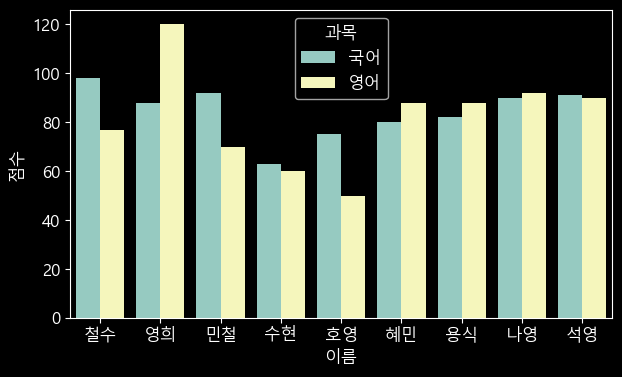

In [34]:
sb.barplot(data=df3,x=df3.index,y='점수',hue='과목')
plt.show()
plt.close()